## Objective: Predict the house price of a given house based on specific features.

#### Import modules and prepare dataset.

In [14]:
# Import sklearn modules.
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Import other modules.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from IPython.display import display

dataset = load_boston()    # Predicting boston house prices.

data = dataset.data
target = dataset.target

print(data.shape)
print(target.shape)

# Check for zeros in data.
print(np.sum(data == 0)/data.size)    # -> 13% (zeros)
print(np.sum(data != 0)/data.size)    # -> 87% (non zeros)

# Check for NaN values in data.
print(np.isnan(np.sum(data)))    # -> False

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

(506, 13)
(506,)
0.12815445424141075
0.8718455457585892
False
X_train.shape: (379, 13)
y_train.shape: (379,)
X_test.shape: (127, 13)
y_test.shape: (127,)


#### Visualize the data

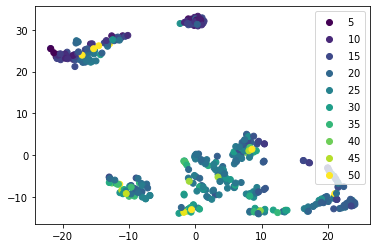

In [16]:
tsne = TSNE()

X_train_trans = tsne.fit_transform(X_train)

scatter = plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c=y_train)
plt.legend(*scatter.legend_elements())

# NOTE: After running this code, You see that there is zero correlation of the data.
#       This means that binning for linear models will have a small effect on how it performs.


----- Objective - Use Basic models (knn, linear models, naive bayes) on the dataset -----

In [22]:
# Use binning on features for better performance on Linear Models.
kb = preprocessing.KBinsDiscretizer(n_bins=10, encode='onehot-dense')
X_train_binned = kb.fit_transform(X_train)
X_test_binned = kb.transform(X_test)

# Create Linear Regression model.
lr_reg = linear_model.LinearRegression(n_jobs=-1).fit(X_train_binned, y_train)

# NOTE: Linear Regression is a very basic model that is not very customizable.

start_time = time()
print('\n\n\t---------- Test Results ----------- ')
print(f'\tTest Score -> {lr_reg.score(X_test_binned, y_test)*100:.2f}%')
print(f'\tTrain Score -> {lr_reg.score(X_train_binned, y_train)*100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')

# Create KNN model.

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)

start_time = time()
print('\n\n\t---------- Test Results ----------- ')
print(f'\tTest Score -> {knn_reg.score(X_test, y_test)*100:.2f}%')
print(f'\tTrain Score -> {knn_reg.score(X_train, y_train)*100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')

lr_reg.fit(X_train, y_train)

# NOTE: Naive Bayes models do aren't for regression tasks.




	---------- Test Results ----------- 
	Test Score -> 81.27%
	Train Score -> 87.33%
	Elapsed -> 0.00 minutes


	---------- Test Results ----------- 
	Test Score -> 73.10%
	Train Score -> 82.50%
	Elapsed -> 0.00 minutes


LinearRegression(n_jobs=-1)

----- Objective: Use ensemble methods -----

In [18]:
# Create Random Forest Regression model and setting hyperparameters to prevent overfitting.
rf_reg = ensemble.RandomForestRegressor(max_features=13, max_depth=7.5, n_estimators=1000).fit(X_train, y_train)
start_time = time()

# NOTE: Random Forests Regerssor is a collection of decision trees where each tree is slightly different from the others.
#       Each tree overfits and when we combine their results, we will create an overall result that doesn't overfit.
#       This algorithm ensures each tree is different by injecting randomness into the tree building to ensure each tree is different.

# NOTE: For regression tasks, it's better to have max_features=n_features, while for classification, max_features=sqrt(n_features).

print('\n\n\t---------- Test Results ----------- ')
print(f'\tTest Score -> {rf_reg.score(X_test, y_test)*100:.2f}%')
print(f'\tTrain Score -> {rf_reg.score(X_train, y_train)*100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')

# Create gradient boosting model.
gbrt_reg = ensemble.GradientBoostingRegressor(max_features=13, learning_rate=0.01, random_state=42).fit(X_train, y_train)
start_time = time()

# NOTE: Gradient boosting trees correct the mistakes of the previous one.
# NOTE: There is no randomization, but strong pre-pruning. If the parameters are set correctly, it performs better than Random Forests.

print('\n\n\t---------- Test Results ----------- ')
print(f'\tTest Score -> {gbrt_reg.score(X_test, y_test)*100:.2f}%')
print(f'\tTrain Score -> {gbrt_reg.score(X_train, y_train)*100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')

# NOTE: Although SVM's are very powerful, they take a long time to change hyperparameters to gain a good score.
#       rf_reg and gbrt_reg are better for time management and take less stress off of hyperparameters.




	---------- Test Results ----------- 
	Test Score -> 82.33%
	Train Score -> 96.60%
	Elapsed -> 0.00 minutes


	---------- Test Results ----------- 
	Test Score -> 65.12%
	Train Score -> 75.97%
	Elapsed -> 0.00 minutes


----- Objective: Use more complex models -----

In [24]:
# Scaling data for SVR
scaler = preprocessing.RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create SVR.
svm_reg = svm.SVR(kernel='linear', C=1).fit(scaled_X_train, y_train)
start_time = time()

print('\n\n\t---------- Test Results ----------- ')
print(f'\tTest Score -> {svm_reg.score(scaled_X_test, y_test)*100:.2f}%')
print(f'\tTrain Score -> {svm_reg.score(scaled_X_train, y_train)*100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')

# Create MLPRegressor
mlp_reg = neural_network.MLPRegressor(alpha=50, random_state=42, hidden_layer_sizes=[1000, 1000, 1000], solver='lbfgs')
mlp_reg.fit(X_train, y_train)
start_time = time()

# NOTE: solver='lbfgs' is better for smaller datasets (< 1000)

print('\n\n---------- Test Results ----------- ')
print(f'Test Score -> {mlp_reg.score(X_test, y_test)*100:.2f}%')
print(f'Train Score -> {mlp_reg.score(X_train, y_train)*100:.2f}%')
print(f'Elapsed -> {(time() - start_time)/60:.2f} minutes')
print(f'Number of Layers -> {mlp_reg.n_layers_}')




	---------- Test Results ----------- 
	Test Score -> 73.54%
	Train Score -> 69.32%
	Elapsed -> 0.00 minutes


---------- Test Results ----------- 
Test Score -> 86.33%
Train Score -> 96.56%
Elapsed -> 0.00 minutes
Number of Layers -> 5


---------- Cross Validation Test Results ----------


,fit_time,score_time,test_score,train_score
0,1.417206,0.002991,0.135403,0.715989
1,1.328457,0.000988,0.103288,0.717793
2,1.403248,0.000997,-2.614252,0.698812
3,1.367344,0.001994,0.371336,0.690953
4,1.364354,0.013957,0.246142,0.708686
5,1.329447,0.001011,0.316854,0.640103
6,1.288563,0.000988,-0.233355,0.710375
7,1.277586,0.001995,0.364162,0.756888
8,0.773934,0.000996,-0.291984,0.708030
9,0.800900,0.000952,-1.244045,0.701085


----- Objective: Plot the data using the TSNE data -----

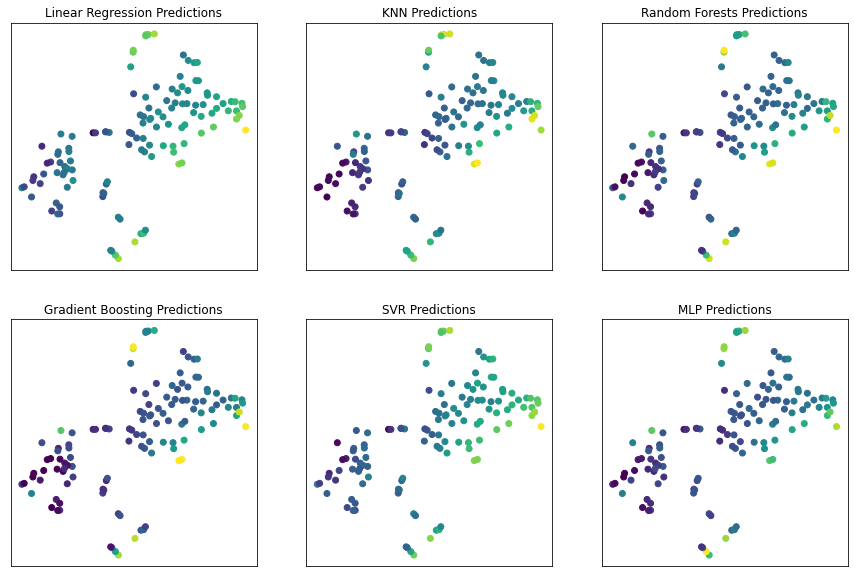

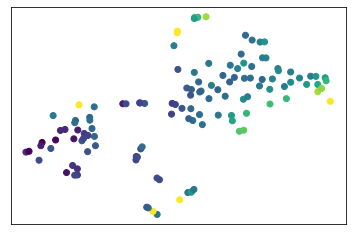

In [23]:
tsne_data = manifold.TSNE().fit_transform(X_test)

def plot_pred(*models):
    fig, axs = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 10))
    axs = [ax for ax in axs.flat]
    model_names = ['Linear Regression', 'KNN', 'Random Forests', 'Gradient Boosting', 'SVR', 'MLP']

    for ax, model, model_name in zip(axs, models, model_names):
        ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=model.predict(X_test))
        ax.set_title(f'{model_name} Predictions')
    
    fig = plt.figure()
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test)
    plt.xticks([])
    plt.yticks([])

plot_pred(lr_reg, knn_reg, rf_reg, gbrt_reg, svm_reg, mlp_reg)
